# ME 793 Assignment 7
19D100011

# Gradient Descent

Ref: https://colab.research.google.com/gist/sagarmainkar/5cfa33898a303f895da5100472371d91/notebook.ipynb#scrollTo=mLJ9auYUY9aa
https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

In [29]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#plt.style.use(['ggplot'])

# Create Data

<h5> Generate some data with:
\begin{equation} intercept= 5 \end{equation}
\begin{equation} slope= 10 \end{equation}

Add some Gaussian noise to the data

In [3]:
X = 1*np.random.rand(200,1)
Y = 5 + 10*X + np.random.randn(200,1)

In [4]:
#print(X)
#print(Y)

Let's plot our data to check the relation between X and Y.

(array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

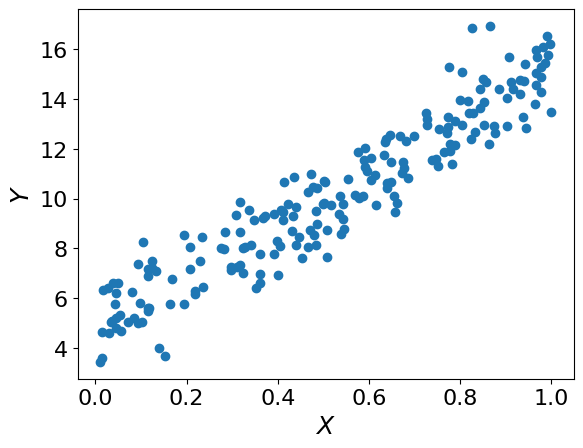

In [5]:
plt.scatter(X,Y)
plt.xlabel("$X$", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("$Y$",fontsize=18)
plt.yticks(fontsize=16)
#_ =plt.axis([0,2,0,15])

#  Analytical method of Linear Regression
 Let us first think about a simpler problem of $$\mathbf{Y}=\mathbf{w} \mathbf{X}$$ in which there is no bias involved i.e. the line passed through origin in this case.
 The above equation can be written as
 $$\mathbf{Y} \mathbf{X}^T=\mathbf{w} \mathbf{X}\mathbf{X}^T$$
 $$\mathbf{Y} \mathbf{X}^T (\mathbf{X}\mathbf{X}^T)^{-1}=\mathbf{w}$$
 $\mathbf{Y} \mathbf{X}^T$ is a scalar, thus the above equation can also be written as (it can be post multiplied instead of pre-multiplied)
 $$(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}=\mathbf{w}$$
 If $\mathbf{X}$ is a $m \times 2$, $\mathbf{w}$ will account for bias and weight both i.e. in that case, it will be a vector given by $\mathbf{w}$ of size $2 \times 1$. 2 is for bias and weight, respectively. To solve for weight and bias both using the above equation, $\mathbf{X}$ can be modified to a matrix by adding a column of 1s.

### Fit the data using linalg.inv function of numpy library

In [6]:
X_b = np.c_[np.ones((200,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(theta_best)
#X_b = np.c_[np.ones((100,1)),X]
#theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#print(theta_best)
#X_b = np.c_[np.ones((100,1)),X]

[[ 4.6953607 ]
 [10.43188798]]


np.c_ and np.r_ are two functions available in numpy library.
np.c_ concatenates along the second axis i.e. in the column direction, i.e. the number of columns will increase after the concatenation.
np.r_ concatenates along the first axis i.e. in the row direction, i.e. the number of rows will increase after the concatenation.

In [7]:
#print(X_b)
intercept_slop_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(intercept_slop_best) # note that the this model will not give accurate results since we have added noise.

[[ 4.6953607 ]
 [10.43188798]]


### Test the predicted data. So that we can draw a predicted line end to end.

In [8]:
X_new = np.array([[0],[1]]) # this is the new input vector for which we test the above found w and b.
X_new_b = np.c_[np.ones((2,1)),X_new] # Since the new vector is (2 x 1) shape, the Y predict will also be same shape.
Y_predict = X_new_b.dot(theta_best)
Y_predict

array([[ 4.6953607 ],
       [15.12724868]])

(0.0, 1.0, 0.0, 20.0)

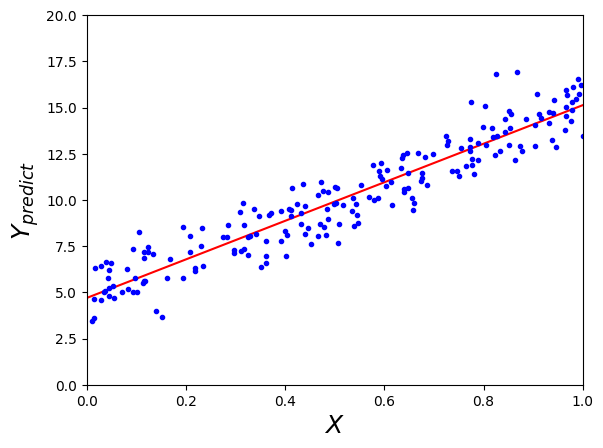

In [9]:
plt.plot(X_new,Y_predict,'r-') # predicted line will be of red color, drawn from x=0 to x=1
plt.plot(X,Y,'b.')
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y_{predict}$", rotation=90, fontsize=18)
plt.axis([0,1,0,20])

# Gradient Descent

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. If you look at the gradient, it is specifically for linear regression. The analytical form of gradient will change if a different regression is addressed.



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - Y^{(i)})^2
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - Y^{(i)}).X_j^{(i)}
\end{equation}

<b>Updated value of model parameter</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - Y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - Y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - Y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - Y^{(i)}).X_0^{(i)})
\end{equation}
$\alpha$ is learning rate.

In [10]:
def  cal_cost(theta,X,Y):
    '''

    Calculates the cost for given X and y. The following shows and example of a single dimensional X
    theta = Vector of thetas
    X     = Row of X's np.zeros((2,j))
    Y     = Actual y's np.zeros((2,1))

    where:
        j is the no of features
    '''

    m = len(Y)

    predictions = X.dot(theta)
    cost = (1/m) * np.sum(np.square(predictions-Y))
    return cost


In [11]:
def gradient_descent(X,Y,theta,learning_rate=0.01,iterations=100):
    # In this algorithm all the data is used.
    '''
    X    = Matrix of X with added bias units
    Y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(Y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):

        prediction = np.dot(X,theta)

        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - Y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,Y)

    return theta, cost_history, theta_history

<h3> Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [12]:
lr =0.1
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,Y,theta,lr,n_iter)


print('Intercept:          {:0.3f},\nSlope:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Intercept:          4.699,
Slope:          10.425
Final cost/MSE:  1.128


<h3> Let's plot the cost history over iterations

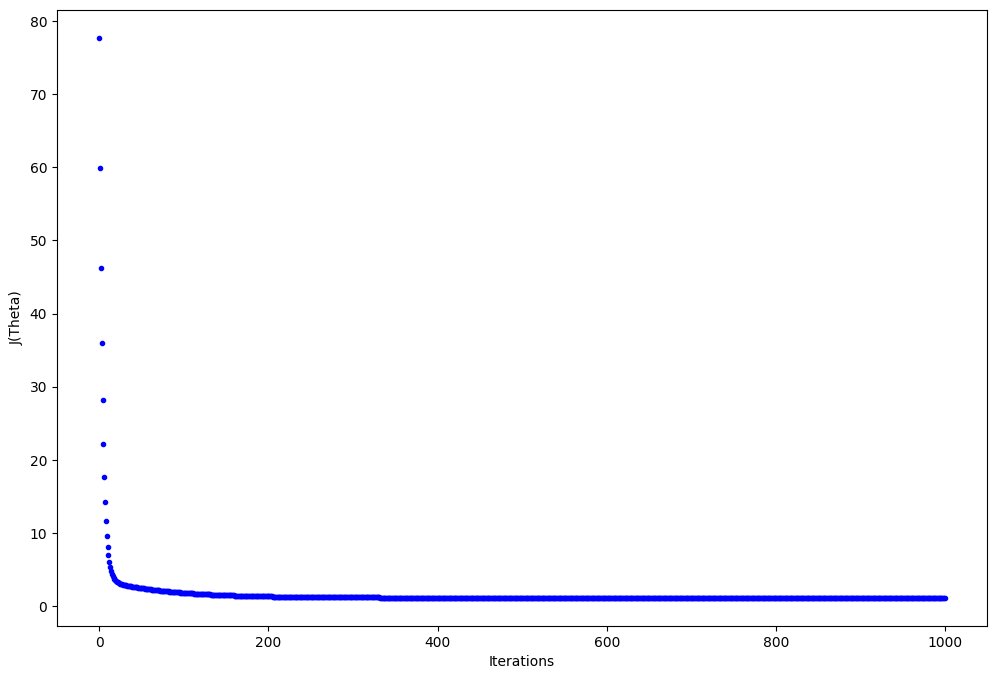

In [13]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

<h3> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

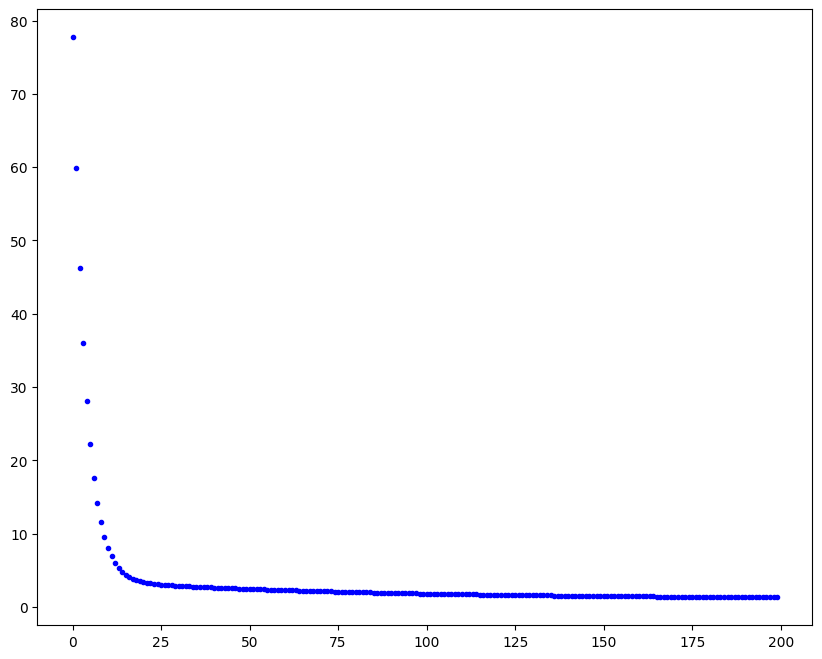

In [14]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

<b>It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

### It would be great to see the effect of different learning rates and iterations together

### Let us  build a function which can show the effects together and also show how gradient decent actually is working

In [15]:
def plot_GD(n_iter,lr,ax,ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """
    _ = ax.plot(X,Y,'b.')
    theta = np.random.randn(2,1)

    tr = 0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,Y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1==None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

### Plot the graphs for different iterations and learning rates combination

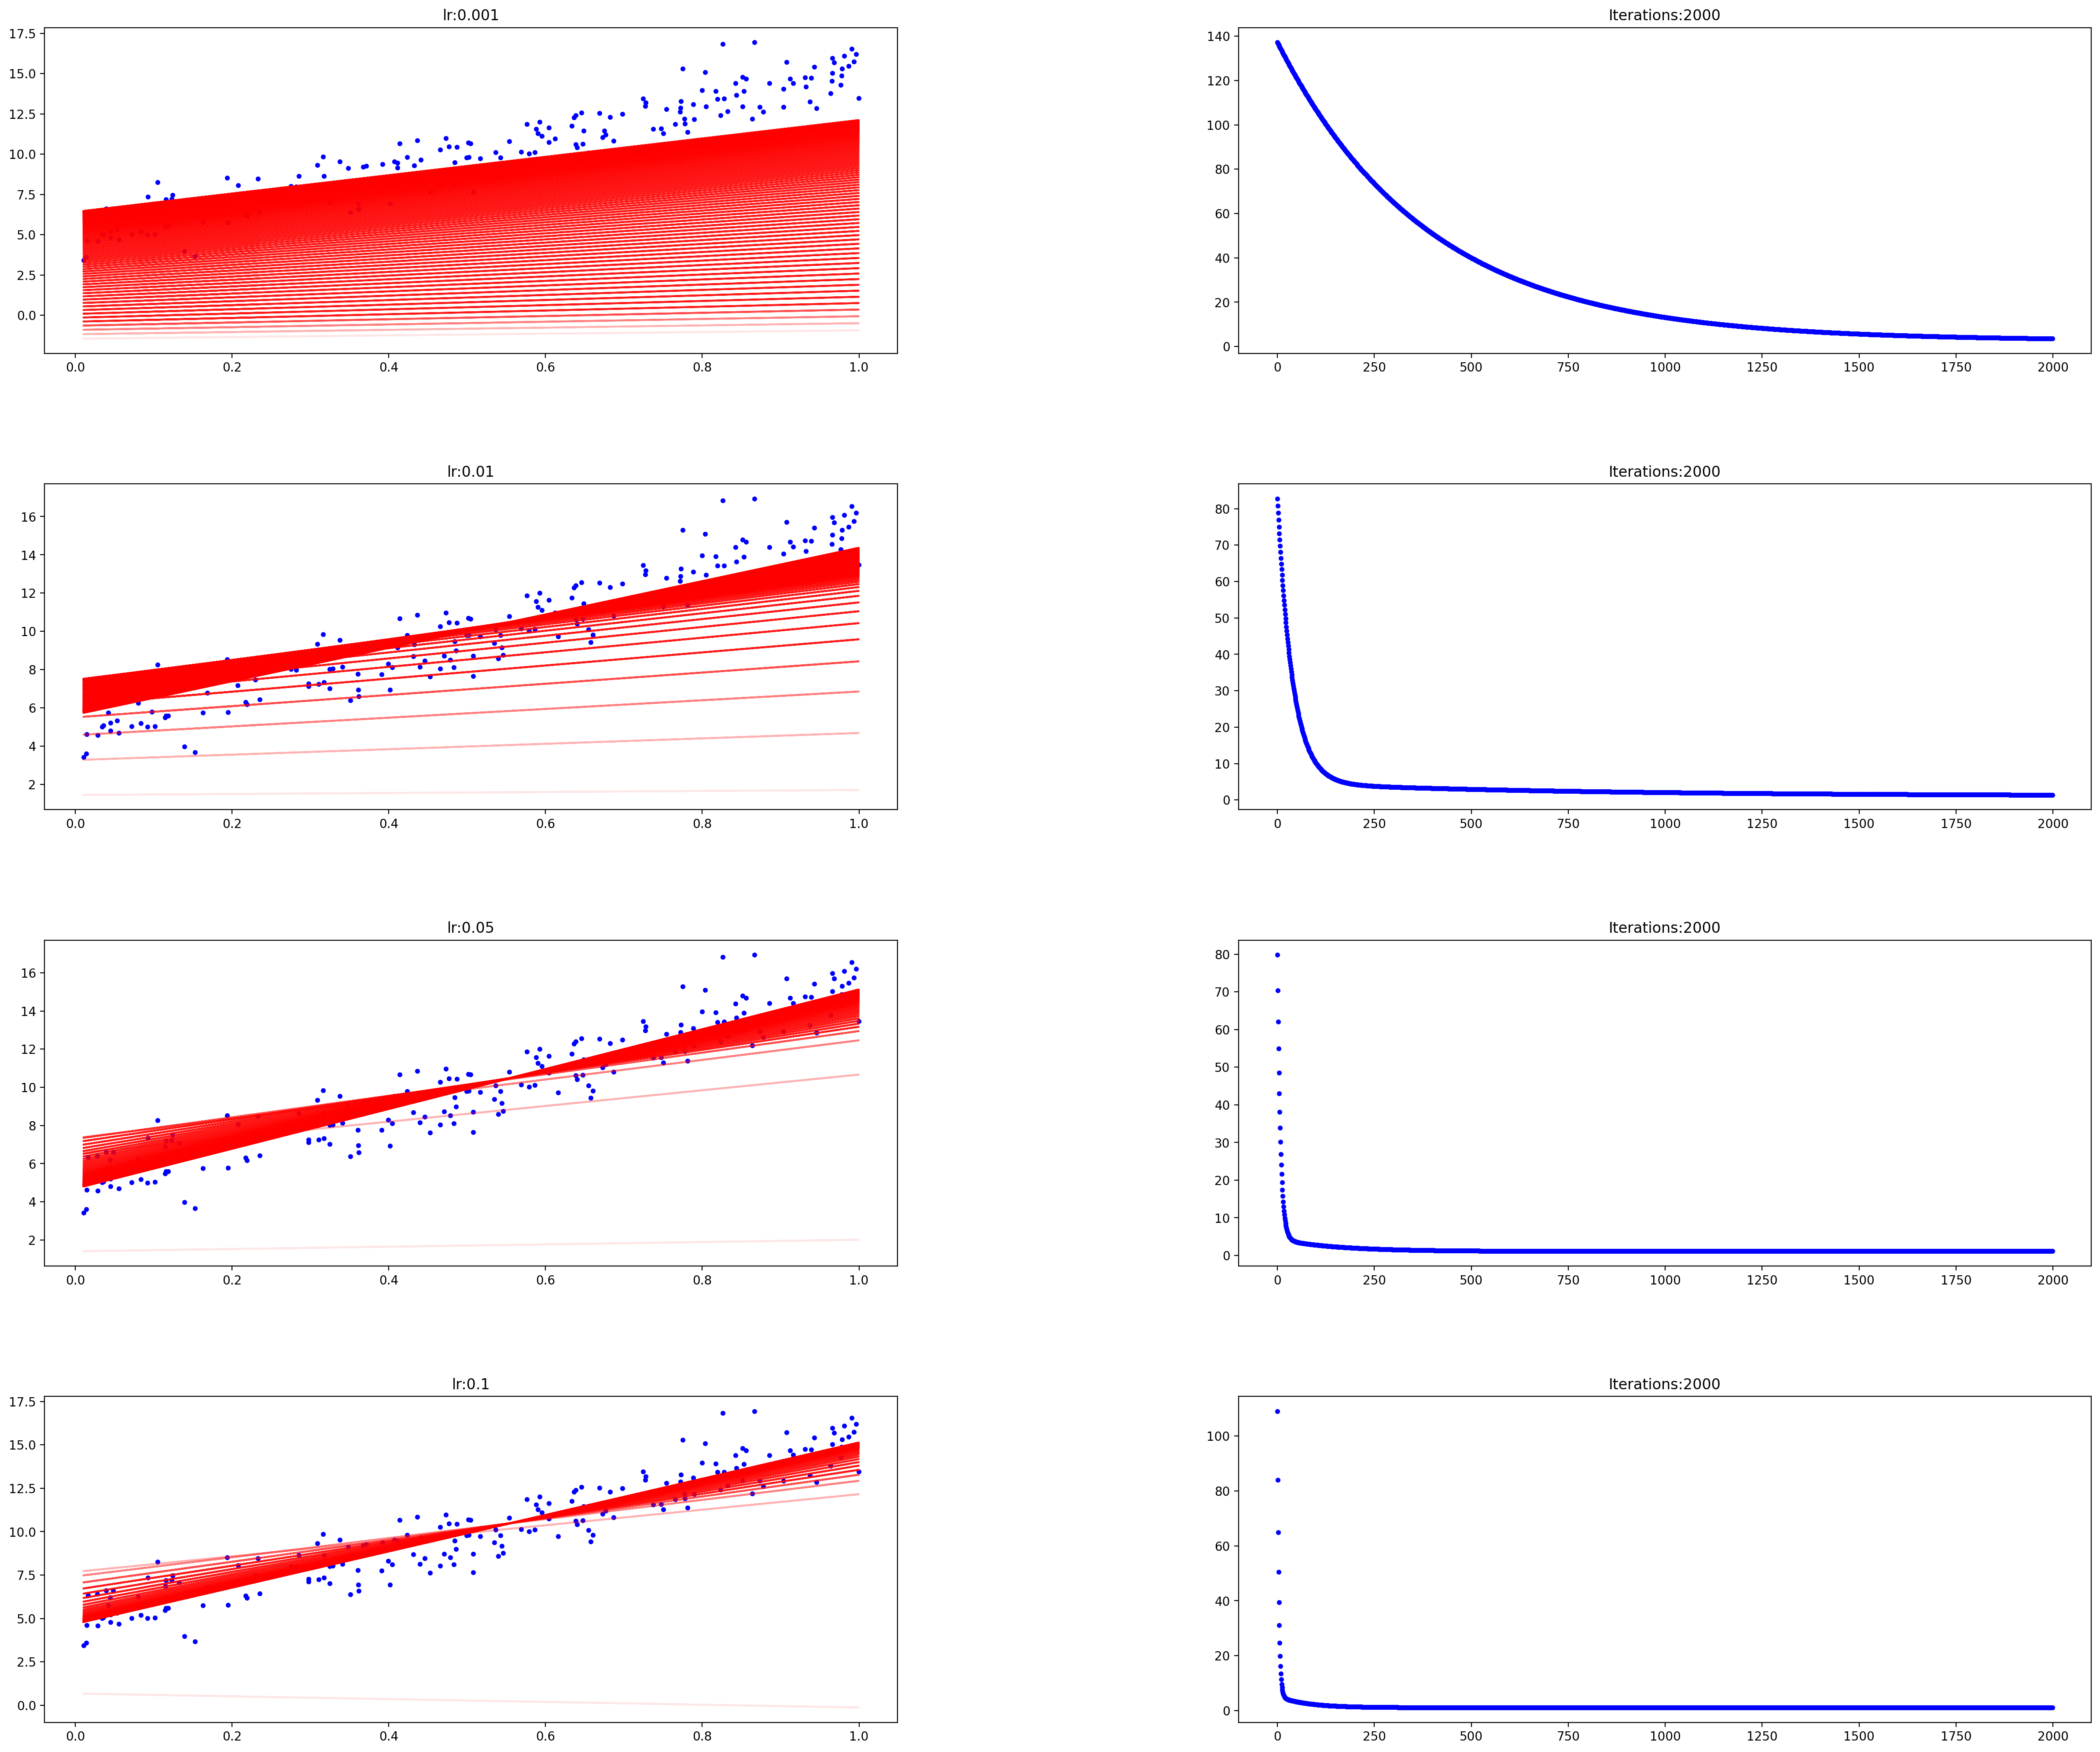

In [16]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(2000,0.01),(2000,0.05),(2000,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)


<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

## You can always plot Indiviual graphs to zoom in

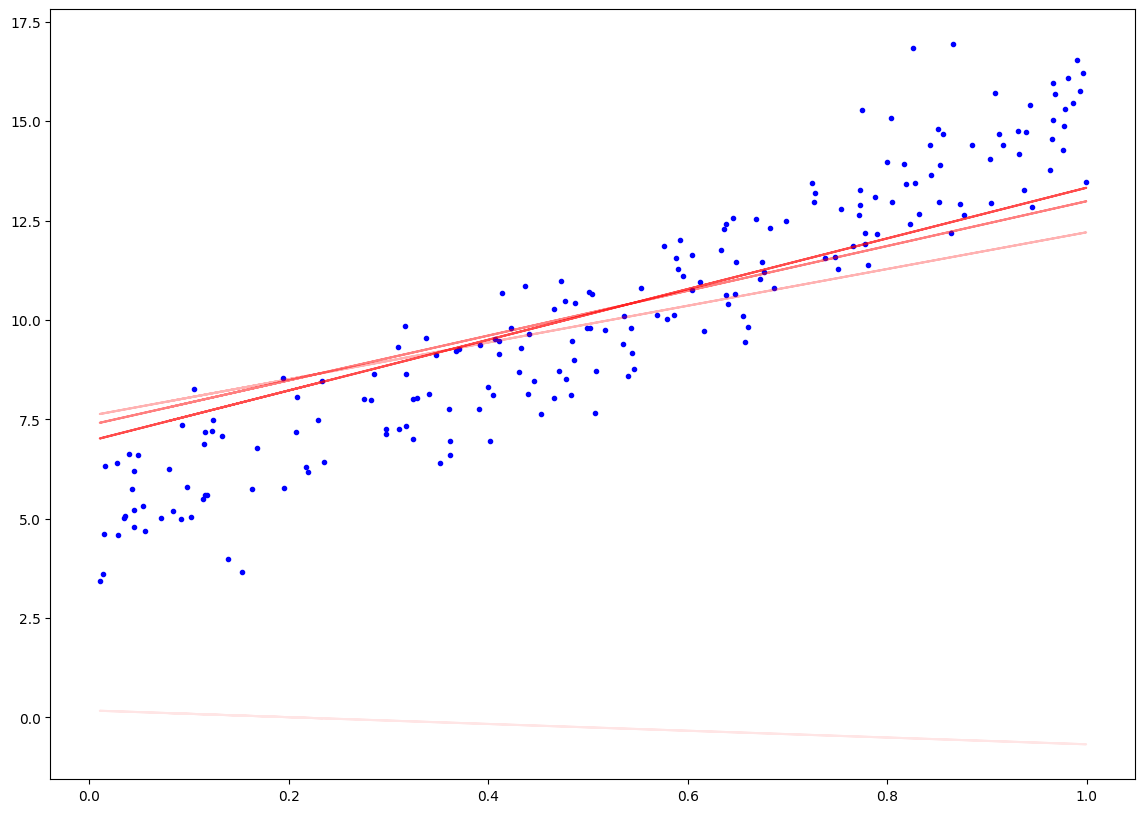

In [17]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

# Stochastic Gradient Descent

In [18]:
def stocashtic_gradient_descent(X,Y,theta,learning_rate=0.01,iterations=10):
    # In this algorithm observations are determined using a random selection (with repetition),
    # loss for individual observations is predicted and MSE is determined.
    # A small batch can also be used.
    '''
    X    = Matrix of X with added bias units
    Y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(Y)
    cost_history = np.zeros(iterations)


    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            Y_i = Y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - Y_i)))
            cost += cal_cost(theta,X_i,Y_i)
        cost_history[it]  = cost

    return theta, cost_history

In [19]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,Y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          5.181,
Theta1:          9.538
Final cost/MSE:  185.109


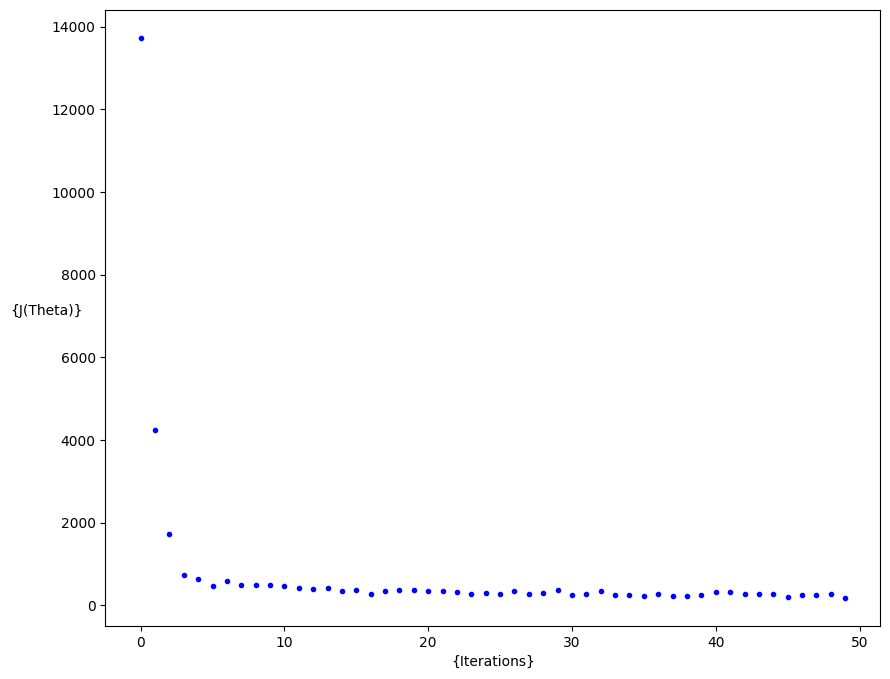

In [20]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent

In [30]:
def minibatch_gradient_descent(X,Y,theta,learning_rate=0.01,iterations=10,batch_size=20):
    '''
    X    = Matrix of X without added bias units
    Y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(Y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)

    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        Y = Y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            Y_i = Y[i:i+batch_size]

            X_i = np.c_[np.ones(len(X_i)),X_i]

            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - Y_i)))
            cost += cal_cost(theta,X_i,Y_i)
        cost_history[it]  = cost

    return theta, cost_history

# Answer 1

In [31]:
# Split data
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.18, random_state=42)

In [32]:
lr = 0.1
n_iter = 1000
b_size = 20

theta = np.random.randn(2,1)
theta, cost_history = minibatch_gradient_descent(X_train, Y_train, theta, lr, n_iter, b_size)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.771,
Theta1:          10.379
Final cost/MSE:  9.306


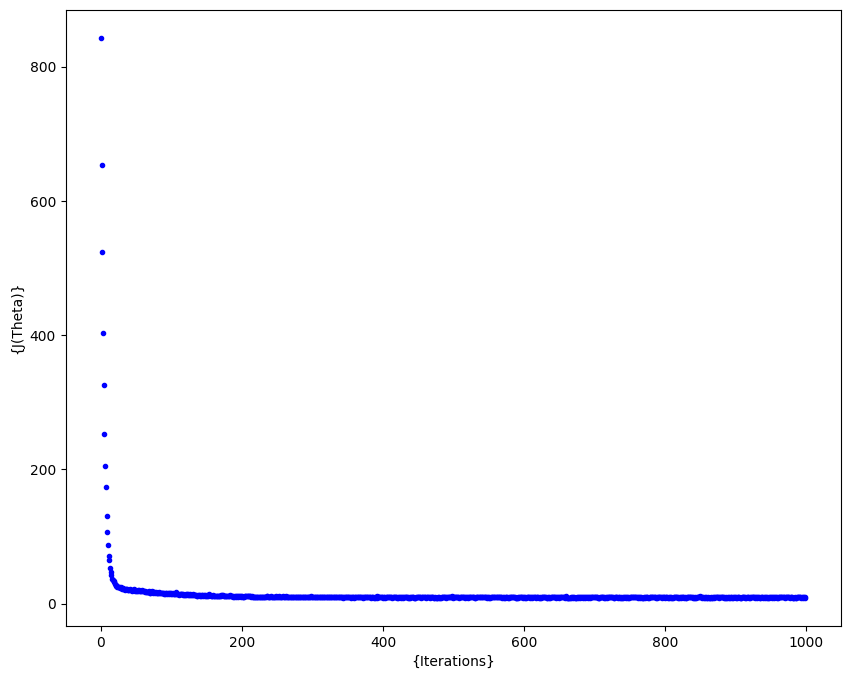

In [33]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}')
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Answer 2

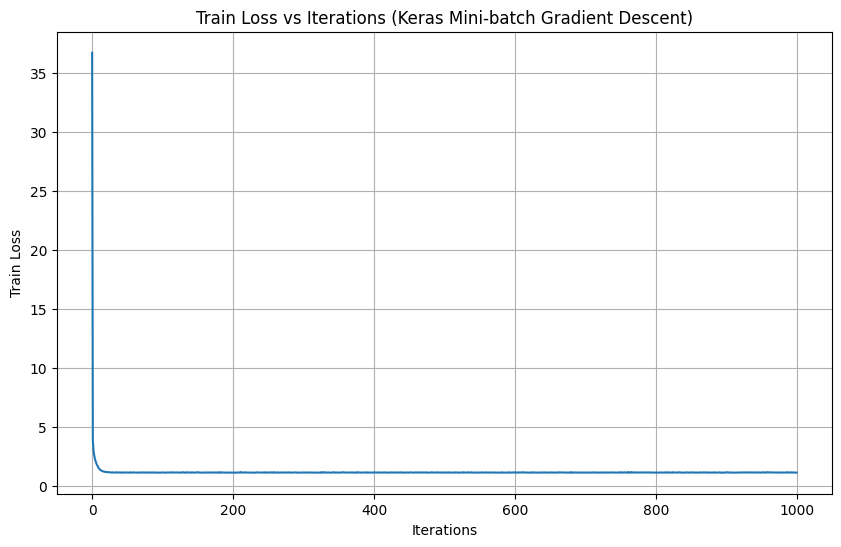

In [36]:
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='random_normal'))

# Compile model
sgd = SGD(learning_rate=lr)
model.compile(loss='mean_squared_error', optimizer=sgd)

# Fit model
history = model.fit(X_train, Y_train, epochs=n_iter, batch_size=b_size, validation_data=(X_val, Y_val), verbose=0)

# Plot train loss vs iterations for every mini-batch
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Train Loss')
plt.title('Train Loss vs Iterations (Keras Mini-batch Gradient Descent)')
plt.grid(True)
plt.show()

# Answer 3

In [38]:
# Calculate predictions for test set
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
Y_pred_test_manual = X_test_b.dot(theta)
Y_pred_test_keras = model.predict(X_test)

# Calculate R2 and RMSE for both methods
r2_manual = r2_score(Y_test, Y_pred_test_manual)
rmse_manual = np.sqrt(mean_squared_error(Y_test, Y_pred_test_manual))

r2_tf = r2_score(Y_test, Y_pred_test_keras)
rmse_tf = np.sqrt(mean_squared_error(Y_test, Y_pred_test_keras))

print("Manual Mini-batch Gradient Descent:")
print("Test R2:", r2_manual)
print("Test RMSE:", rmse_manual)
print("\nTensorFlow Mini-batch Gradient Descent:")
print("Test R2:", r2_tf)
print("Test RMSE:", rmse_tf)

1/1 [==============================] - 0s 74ms/step
Manual Mini-batch Gradient Descent:
Test R2: -7.324930795422457
Test RMSE: 8.986724495176405

TensorFlow Mini-batch Gradient Descent:
Test R2: 0.8980124790818699
Test RMSE: 0.9946828485916323


Why could there be a difference?

Keras may employ more sophisticated optimization techniques or default settings that result in better convergence and performance compared to the simpler manual implementation. But generally it could be due to variations in the optimization process, initialization methods, learning rates, or other hyperparameters between the two implementations, leading to differences in model convergence and generalization capabilities.